In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Inicializações
MaxDose = 0
MaxErrDoseMax = 0

# Importar os dados do arquivo .dat
arquivo = 'C:\\PENELOPE 2008 - aula famb\\2025\\KERNEL\\3d-dose1.dat'
Arq = np.loadtxt(arquivo)  # Carregar o arquivo

# Obtém o número de linhas e colunas do arquivo
linhas, colunas = Arq.shape

# Inicializar as matrizes de Dose e ErrDose com base nos índices máximos encontrados
i_max = int(np.max(Arq[:, 5]))
j_max = int(np.max(Arq[:, 6]))
k_max = int(np.max(Arq[:, 7]))
Dose = np.zeros((i_max, j_max, k_max))
ErrDose = np.zeros((i_max, j_max, k_max))

# Montar as matrizes de Dose e ErrDose
for n in range(linhas):
    i = int(Arq[n, 5]) - 1  # Ajustando para índice zero
    j = int(Arq[n, 6]) - 1  # Ajustando para índice zero
    k = int(Arq[n, 7]) - 1  # Ajustando para índice zero
    Dose[i, j, k] = Arq[n, 3]
    ErrDose[i, j, k] = Arq[n, 4]
    
    if Dose[i, j, k] > MaxDose:
        MaxDose = Dose[i, j, k]
        MaxErrDoseMax = 100 * ErrDose[i, j, k] / Dose[i, j, k]
        MaxDoseVoxel = [i + 1, j + 1, k + 1]  # Converte de volta para índice 1

# Calcula o Grid3dDose e VoxelSize
Grid3dDose = [Arq[-1, 0] - Arq[0, 0], Arq[-1, 1] - Arq[0, 1], Arq[-1, 2] - Arq[0, 2]]
VoxelSize = [Grid3dDose[0] / (i_max - 1), Grid3dDose[1] / (j_max - 1), Grid3dDose[2] / (k_max - 1)]
Grid3dDose = [i_max * VoxelSize[0], j_max * VoxelSize[1], k_max * VoxelSize[2]]

# Posições dos centros dos voxels
VoxelsX = (np.arange(1, i_max + 1) * VoxelSize[0]) - (VoxelSize[0] / 2)
VoxelsY = (np.arange(1, j_max + 1) * VoxelSize[1]) - (VoxelSize[1] / 2)
VoxelsZ = (np.arange(1, k_max + 1) * VoxelSize[2]) - (VoxelSize[2] / 2)

# Corrigir as escalas para o centro do campo
EscalaX = np.linspace(-Grid3dDose[0]/2 + VoxelSize[0]/2, Grid3dDose[0]/2 - VoxelSize[0]/2, i_max)
EscalaY = np.linspace(-Grid3dDose[1]/2 + VoxelSize[1]/2, Grid3dDose[1]/2 - VoxelSize[1]/2, j_max)
EscalaZ = VoxelsZ



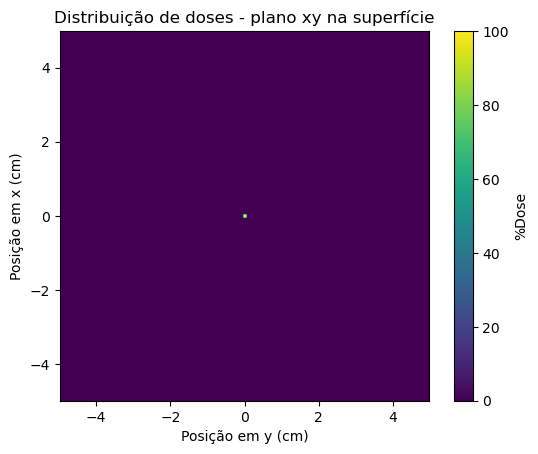

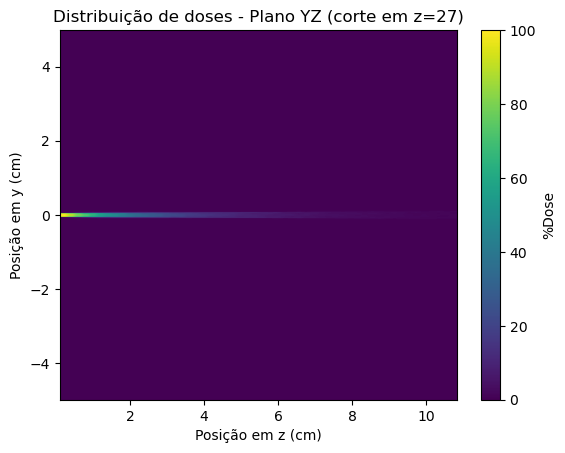

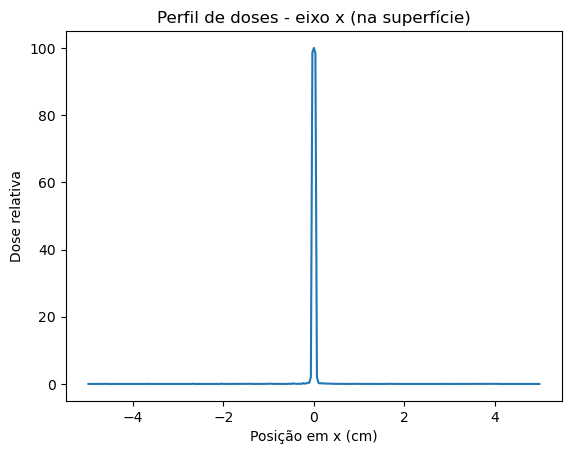

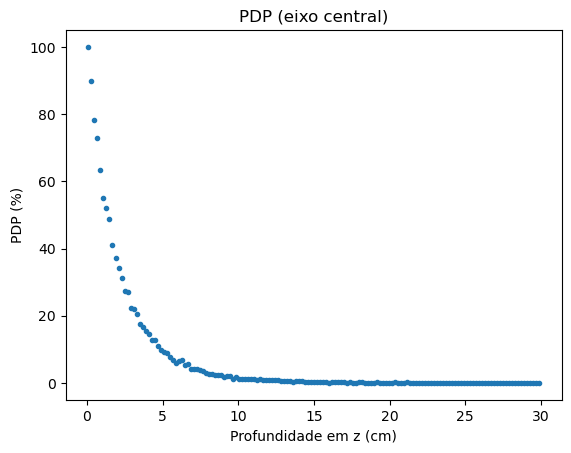

In [3]:
# Plotar a distribuição de doses no plano xy para k = 1 (superfície)
plt.figure()
PlanoXY = np.squeeze(100 * Dose[:, :, 0] / MaxDose)
plt.imshow(PlanoXY, extent=[EscalaY[0], EscalaY[-1], EscalaX[0], EscalaX[-1]], origin='lower')
plt.title('Distribuição de doses - plano xy na superfície')
plt.xlabel('Posição em y (cm)')
plt.ylabel('Posição em x (cm)')
hcb = plt.colorbar()
hcb.set_label('%Dose')
plt.show()

# Plotar a distribuição de doses no plano yz (plano central)
plt.figure()
PlanoYZ = np.squeeze(100 * Dose[int(i_max/2), :, :54] / MaxDose)  # Corta em z=27

# Ajusta a escala para refletir os novos limites em Z
extent_z_cut = [EscalaZ[0], EscalaZ[54], EscalaY[0], EscalaY[-1]]

plt.imshow(
    PlanoYZ,
    extent=extent_z_cut,
    origin='lower',
    aspect='auto'  # Mantém proporções realistas
)
plt.title('Distribuição de doses - Plano YZ (corte em z=27)')
plt.xlabel('Posição em z (cm)')
plt.ylabel('Posição em y (cm)')
hcb = plt.colorbar()
hcb.set_label('%Dose')

plt.show()

# Plotar o perfil de doses na superfície ao longo do eixo x
Perfil = 100 * Dose[:, int(j_max/2), 0] / MaxDose
plt.figure()
plt.plot(EscalaX, Perfil)
plt.title('Perfil de doses - eixo x (na superfície)')
plt.xlabel('Posição em x (cm)')
plt.ylabel('Dose relativa')
plt.show()

# Plotar a dose em profundidade no eixo central
DoseZ = np.squeeze(Dose[int(i_max/2), int(j_max/2), :])
MaxDoseZ = np.max(DoseZ)
plt.figure()
plt.plot(EscalaZ, 100 * DoseZ / MaxDoseZ, '.')
plt.title('PDP (eixo central)')
plt.xlabel('Profundidade em z (cm)')
plt.ylabel('PDP (%)')
plt.show()

In [2]:
import numpy as np

# Carregar os dados do arquivo .dat
arquivo = 'C:\\PENELOPE 2008 - aula famb\\2025\\Refazendo\\Chumbo 25 furos\\3d-dose1.dat'
dados = np.loadtxt(arquivo)

# Encontrar o voxel com MAIOR ERRO (coluna 5, índice 4)
indice_max_erro = np.argmax(dados[:, 4])  # Índice da linha com maior erro (3σ)
voxel_max_erro = {
    'coordenadas': dados[indice_max_erro, 0:3],  # X, Y, Z (cm)
    'dose': dados[indice_max_erro, 3],           # Dose (eV/g)
    'erro_3sigma': dados[indice_max_erro, 4],    # Erro estatístico (3σ)
    'indices': dados[indice_max_erro, 5:8]       # IX, IY, IZ (índices do voxel)
}

print("Voxel com maior erro estatístico (3σ):")
print(f"- Coordenadas (X, Y, Z): {voxel_max_erro['coordenadas']} cm")
print(f"- Dose: {voxel_max_erro['dose']} eV/g")
print(f"- Erro (3σ): {voxel_max_erro['erro_3sigma']}")
print(f"- Índices do voxel (IX, IY, IZ): {voxel_max_erro['indices']}")

# Verificar se o erro está associado a uma dose baixa (opcional)
if voxel_max_erro['dose'] < 1e-6:  # Ajuste o limite conforme necessário
    print("\nAVISO: Este voxel tem dose muito baixa, o que pode explicar o alto erro.")

Voxel com maior erro estatístico (3σ):
- Coordenadas (X, Y, Z): [-0.2007  -0.02007  0.09934] cm
- Dose: 200.925 eV/g
- Erro (3σ): 36.0
- Índices do voxel (IX, IY, IZ): [130. 148.   1.]
